Лабораторна робота 

7.Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 3 та 5 з використанням Tensorflow & NN.

Класифікація

[1 0 3 2]
[0 1 2 3]
Epoch 1/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7772 - loss: 0.7040 - val_accuracy: 0.8788 - val_loss: 0.3661
Epoch 2/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8981 - loss: 0.2998 - val_accuracy: 0.8891 - val_loss: 0.3221
Epoch 3/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9027 - loss: 0.2554 - val_accuracy: 0.8934 - val_loss: 0.2988
Epoch 4/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9117 - loss: 0.2296 - val_accuracy: 0.8961 - val_loss: 0.2801
Epoch 5/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9146 - loss: 0.2079 - val_accuracy: 0.8918 - val_loss: 0.2839
Epoch 6/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9136 - loss: 0.2033 - val_accuracy: 0.8934 - val_loss: 0.2712
Epoch 7/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9172 - loss: 0.1987 - val_accuracy: 0.9010 - val_loss: 0.2713
Epoch 8/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.195

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_98 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,750 (34.18 KB)

 Trainable params: 2,916 (11.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,834 (22.79 KB)

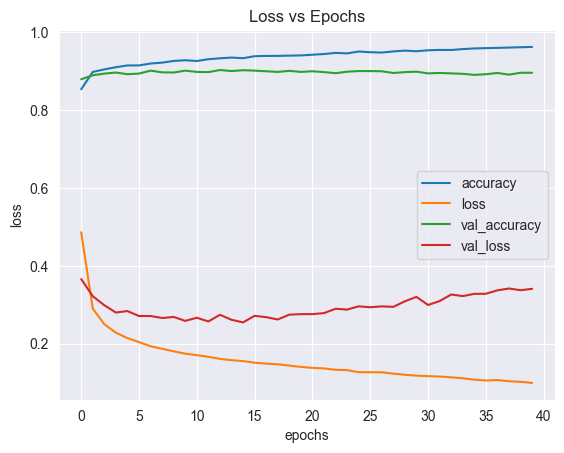

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


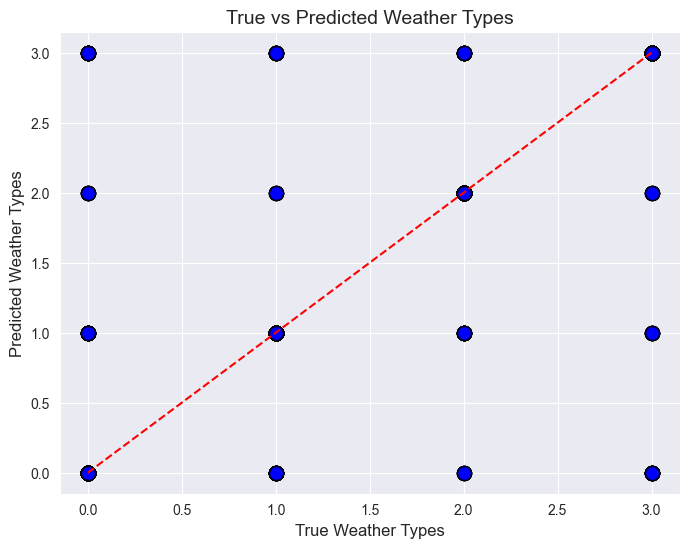

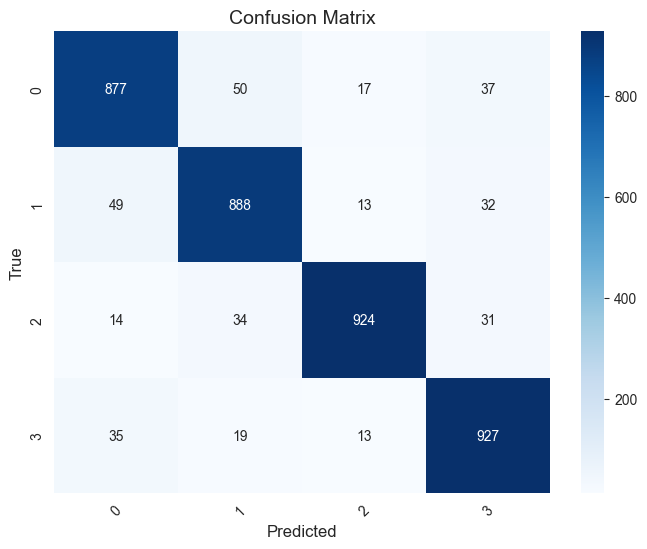

In [45]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Завантаження даних
data_train = pd.read_csv('weather_classification_data.csv')

# Перетворення категоріальних змінних у числові
label_encoder = LabelEncoder()

data_train['Weather Type'] = label_encoder.fit_transform(data_train['Weather Type'])
data_train['Cloud Cover'] = label_encoder.fit_transform(data_train['Cloud Cover'])
data_train['Season'] = label_encoder.fit_transform(data_train['Season'])
data_train['Location'] = label_encoder.fit_transform(data_train['Location'])

# Розділення на ознаки та ціль
y = data_train["Weather Type"]
X = data_train.drop("Weather Type", axis=1)

# Перевірка унікальних значень у колонці 'Weather Type'
print(data_train['Weather Type'].unique())

label_encoder = LabelEncoder()
data_train['Weather Type'] = label_encoder.fit_transform(data_train['Weather Type'])

# Перевірка результатів
print(label_encoder.classes_)

# Розподіл на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# Масштабування числових ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Створення моделі нейронної мережі
classification_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Кількість класів (Weather Type)
])

# Компіляція моделі
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Тренування моделі
history = classification_model.fit(X_train, y_train, epochs=40, batch_size=10, validation_split=0.2)

# Оцінка моделі
loss, accuracy = classification_model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Підсумки моделі
classification_model.summary()

# Побудова графіку втрат
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.show()

# Прогнозування на тестових даних
y_pred = np.argmax(classification_model.predict(X_test), axis=1)

# Візуалізація результатів
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions', edgecolors='k', s=100)  # Кращий контур
plt.plot([0, len(label_encoder.classes_)-1], [0, len(label_encoder.classes_)-1], color='red', linestyle='--', label='Ideal Line')  # Лінія y=x

# Додавання підписів
plt.xlabel('True Weather Types', fontsize=12)
plt.ylabel('Predicted Weather Types', fontsize=12)
plt.title('True vs Predicted Weather Types', fontsize=14)

# Обчислення матриці сплутаності
cm = confusion_matrix(y_test, y_pred)

# Візуалізація теплової карти
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Регресія

Epoch 1/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7722 - val_loss: 0.3157
Epoch 2/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3014 - val_loss: 0.2779
Epoch 3/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2560 - val_loss: 0.2718
Epoch 4/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2251 - val_loss: 0.2827
Epoch 5/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2222 - val_loss: 0.2465
Epoch 6/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2114 - val_loss: 0.2435
Epoch 7/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1977 - val_loss: 0.2457
Epoch 8/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1989 - val_loss: 0.2546
Epoch 9/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1802 - val_loss: 0.2409
Epoch 10/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1876 - val_loss: 0.2443
Epoch 11/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1764 - val_loss: 0.2450
Epoch 12/40
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_95 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

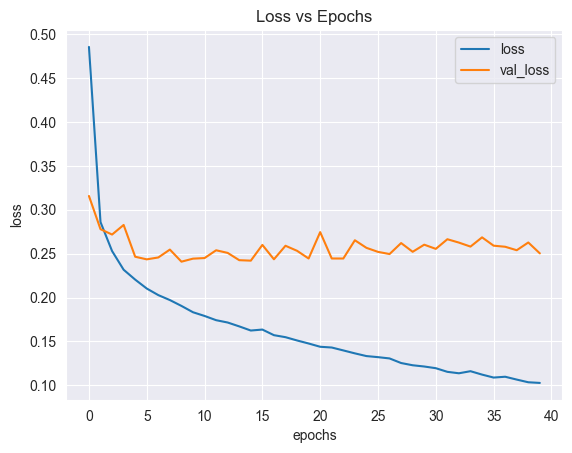

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


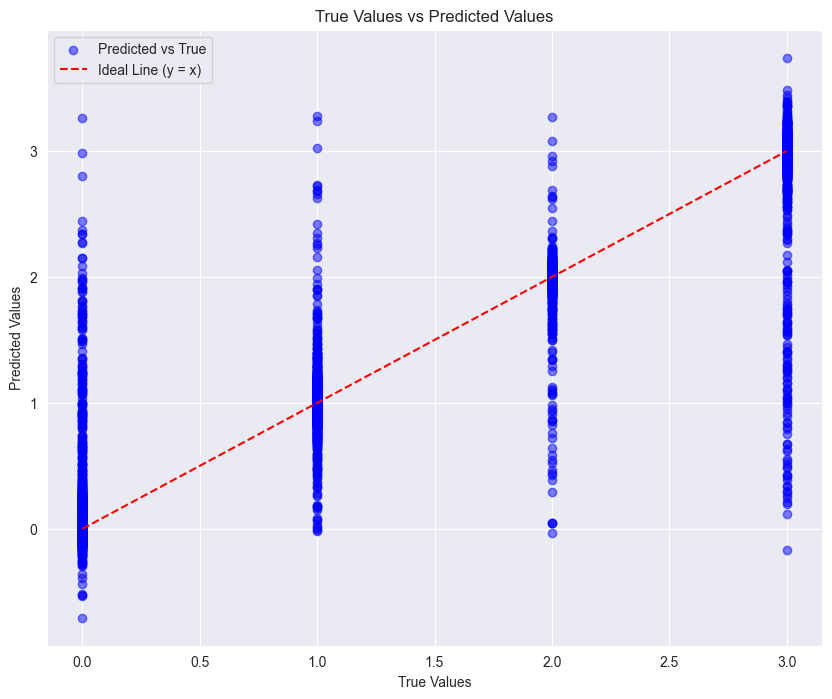

In [44]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Завантаження даних
data_train = pd.read_csv('weather_classification_data.csv')

# Перетворення категоріальних змінних у числові
label_encoder = LabelEncoder()
data_train['Weather Type'] = label_encoder.fit_transform(data_train['Weather Type'])
data_train['Cloud Cover'] = label_encoder.fit_transform(data_train['Cloud Cover'])
data_train['Season'] = label_encoder.fit_transform(data_train['Season'])
data_train['Location'] = label_encoder.fit_transform(data_train['Location'])

# Розділення на ознаки та ціль
y = data_train["Weather Type"]
X = data_train.drop("Weather Type", axis=1)

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# Масштабування числових ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Створення моделі нейронної мережі для регресії
regression_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Виведення одного значення для регресії
])

# Компіляція моделі
regression_model.compile(optimizer='adam', loss='mean_squared_error')

# Тренування моделі
history = regression_model.fit(X_train, y_train, epochs=40, batch_size=10, validation_split=0.2)

# Оцінка моделі
loss = regression_model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")

# Підсумки моделі
regression_model.summary()

# Побудова графіку втрат
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.show()

# Прогнозування на тестових даних
y_pred = regression_model.predict(X_test)

# Візуалізація результатів
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line (y = x)')

# Підписи та налаштування
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
